# Analysis of NYC Traffic Accidents

Motor vehicle collisions reported by the New York City Police Department from January-August 2020. Each record represents an individual collision, including the date, time and location of the accident (borough, zip code, street name, latitude/longitude), vehicles and victims involved, and contributing factors.

by: Kenneth Muriuki Kimathi

    email: muriukikim0@gmail.com

[Linkedin](https://www.linkedin.com/in/kenneth-k-29b2157a/)

## Introduction

The objective of this analysis is to gain insights from the NYC Traffic Accidents dataset, which consists of motor vehicle collisions reported by the New York City Police Department from January to August 2020. This dataset provides comprehensive details about each collision, including the date, time, location, vehicles involved, victims, and contributing factors.

In this analysis, I will explore the dataset to uncover valuable information about the nature of these accidents and identify any underlying patterns or trends. By examining various aspects of the data, I aim to address the following objectives:

1. Seasonal Patterns: I will examine the percentage of total accidents by month to determine if there are any seasonal patterns. This analysis will help me understand if there are specific months when accidents are more frequent, potentially highlighting factors contributing to increased accident rates during certain periods.

2. Time and Day Analysis: I will break down the accident frequency by the day of the week and hour of the day. By doing so, I can pinpoint the time periods when accidents occur most frequently. This information will provide valuable insights into the timing and patterns of accidents, assisting in the development of targeted strategies for accident prevention.

3. Street Analysis: I will identify the street with the highest number of reported accidents and calculate the percentage of accidents it represents compared to the total reported accidents. This analysis will shed light on the most accident-prone areas in New York City, allowing for a better understanding of localized risk factors and potential areas for improvement.

4. Contributing Factors: I will determine the most common contributing factor for accidents reported in the dataset, focusing specifically on Vehicle 1. Additionally, I will investigate the most common contributing factor for fatal accidents. This analysis will enable me to identify the key factors associated with accidents and fatal outcomes, providing valuable insights for targeted interventions and road safety initiatives.

By conducting these analyses, I aim to uncover meaningful patterns and correlations in the data, allowing for a comprehensive understanding of motor vehicle collisions in New York City. The insights gained will be valuable for policymakers, city planners, and other stakeholders in their efforts to improve road safety and reduce the number of accidents on the streets of New York City.

## Import Dependencies

In [6]:
import pandas as pd
import sqlite3 as sql
%matplotlib inline
import matplotlib.pyplot as plt
!pip install Pyppeteer
!pyppeteer-install

chromium is already installed.


In [7]:
df = pd.read_csv('./Documents/NYC Accidents 2020.csv')

In [8]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


## Database Connection

In [9]:
conn = sql.connect('Accidents.db')

In [10]:
df.to_sql('Accidents', conn, if_exists='replace', index=False)

74881

In [11]:
pd.read_sql_query("SELECT * FROM Accidents LIMIT 5", conn)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,None,...,Unspecified,None,None,None,4342908,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,None,...,Unspecified,None,None,None,4343555,Sedan,Sedan,None,None,None
2,2020-08-29,18:20:00,None,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,None,None,...,None,None,None,None,4343142,Station Wagon/Sport Utility Vehicle,None,None,None,None
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),None,None,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,None,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,None
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),None,None,4609 SNYDER AVENUE,...,Unspecified,None,None,None,4342953,Sedan,Sedan,None,None,None


## Data Cleaning 

In [12]:
# Combine 'CRASH DATE' and 'CRASH TIME' into a single datetime column
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'])
df = df.drop(['CRASH DATE', 'CRASH TIME'], axis=1)


In [13]:
# Fill NaN values in 'BOROUGH' with 'UNKNOWN'
df['BOROUGH'] = df['BOROUGH'].fillna('UNKNOWN')

In [14]:
# Fill NaN values in 'ZIP CODE' with a value indicating missing data, here I used 0
df['ZIP CODE'] = df['ZIP CODE'].fillna(0)

In [15]:
# Handle 'Unspecified' or None in 'CONTRIBUTING FACTOR VEHICLE 1'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(['Unspecified', None]), 'CONTRIBUTING FACTOR VEHICLE 1'] = 'UNKNOWN'

In [18]:
df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH DATETIME
0,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,...,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-08-29 15:40:00
1,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,...,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 21:00:00
2,UNKNOWN,0.0,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,...,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2020-08-29 18:20:00
3,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,...,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN,2020-08-29 00:00:00
4,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,...,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 17:10:00


In [16]:
conn = sql.connect('Accidents.db')
df.to_sql('Accidents', conn, if_exists='replace', index=False)


74881

## DATA ANALYSIS

### What is the total count of recorded crashes?

In [17]:
query = "SELECT COUNT(*) FROM Accidents"
total_crashes = pd.read_sql_query(query, conn)
print('Total recorded crashes:', total_crashes.values[0][0])


Total recorded crashes: 74881


### What is the earliest and latest date of recorded crashes?

In [18]:
earliest_date_query = 'SELECT MIN("CRASH DATETIME") FROM Accidents'
latest_date_query = 'SELECT MAX("CRASH DATETIME") FROM Accidents'

earliest_date = pd.read_sql_query(earliest_date_query, conn)
latest_date = pd.read_sql_query(latest_date_query, conn)

print('Earliest recorded crash:', earliest_date.values[0][0])
print('Latest recorded crash:', latest_date.values[0][0])



Earliest recorded crash: 2020-01-01 00:00:00
Latest recorded crash: 2020-08-29 23:50:00


### Compare the % of total accidents by month. Do you notice any seasonal patterns?

In [19]:
query = """
SELECT 
    strftime('%m', "CRASH DATETIME") AS Month, 
    COUNT(*)*100.0/(SELECT COUNT(*) FROM Accidents) AS Percentage
FROM 
    Accidents
GROUP BY 
    Month
ORDER BY
    Month
"""

monthly_accidents = pd.read_sql_query(query, conn)

print(monthly_accidents)


  Month  Percentage
0    01   19.079606
1    02   18.274329
2    03   14.766096
3    04    5.496721
4    05    8.211696
5    06   10.170804
6    07   12.319547
7    08   11.681201


From the percentages, it looks like the first three months (January, February, March) see a higher proportion of accidents, compared to the remaining months. The percentage drops significantly in April and then gradually increases through June, July, and August. This can be potentially explained by weather conditions (such as snow or ice in winter months) which can impact the number of accidents. Similarly, more people might be traveling in the summer months (June, July, and August), which might explain the rise in the accident percentage.

### Break down accident frequency by day of week and hour of day. Based on this data, when do accidents occur most frequently?



In [20]:
# Query for accident frequency by day of week
query_day = """
SELECT 
    strftime('%w', "CRASH DATETIME") AS DayOfWeek, 
    COUNT(*) AS AccidentCount 
FROM 
    Accidents 
GROUP BY 
    DayOfWeek
ORDER BY 
    AccidentCount DESC
"""

# Query for accident frequency by hour of day
query_hour = """
SELECT 
    strftime('%H', "CRASH DATETIME") AS HourOfDay, 
    COUNT(*) AS AccidentCount 
FROM 
    Accidents 
GROUP BY 
    HourOfDay
ORDER BY 
    AccidentCount DESC
"""

# Execute the queries
accidents_by_day = pd.read_sql_query(query_day, conn)
accidents_by_hour = pd.read_sql_query(query_hour, conn)

# Print the day and hour with the most accidents
print('Day with the most accidents:', accidents_by_day['DayOfWeek'][0])
print('Hour with the most accidents:', accidents_by_hour['HourOfDay'][0])


Day with the most accidents: 5
Hour with the most accidents: 16


The day with the most accidents is '5', which represents Friday when using the 'strftime' function with '%w' in SQLite. This indicates that most accidents occur on Fridays.

The hour with the most accidents is '16', which is 4 PM in a 24-hour clock format. This suggests that 4 PM is the hour when most accidents occur.

In [21]:
# Query for most accident-prone street excluding 'None'
query_street = """
SELECT 
    "ON STREET NAME" AS Street, 
    COUNT(*) AS AccidentCount, 
    COUNT(*)*100.0/(SELECT COUNT(*) FROM Accidents WHERE "ON STREET NAME" IS NOT NULL) AS Percentage
FROM 
    Accidents 
WHERE 
    "ON STREET NAME" IS NOT NULL
GROUP BY 
    Street
ORDER BY 
    AccidentCount DESC
LIMIT 1
"""

# Execute the query
most_accidents_street = pd.read_sql_query(query_street, conn)

# Print the street with the most accidents and its percentage of total accidents
print('Street with the most accidents:', most_accidents_street['Street'][0])
print('Percentage of total accidents:', most_accidents_street['Percentage'][0])



Street with the most accidents: BELT PARKWAY
Percentage of total accidents: 2.238294495346656


The street with the most recorded accidents in your dataset is "BELT PARKWAY". These accidents represent approximately 2.24% of the total recorded accidents on streets where the street name was provided.This could suggest that "BELT PARKWAY" might be a high-risk area. However, other factors could potentially explain the trend, which include traffic volume, road conditions, weather conditions, etc. 

### What was the most common contributing factor for the accidents reported in this sample (based on Vehicle 1)? What about for fatal accidents specifically?

In [22]:
# Query for most common contributing factor for all accidents
query_factor_all = """
SELECT 
    "CONTRIBUTING FACTOR VEHICLE 1" AS ContributingFactor, 
    COUNT(*) AS AccidentCount 
FROM 
    Accidents 
GROUP BY 
    ContributingFactor
ORDER BY 
    AccidentCount DESC
LIMIT 1
"""

# Execute the query
most_common_factor_all = pd.read_sql_query(query_factor_all, conn)

# Print the most common contributing factor for all accidents
print('Most common contributing factor for all accidents:', most_common_factor_all['ContributingFactor'][0])


Most common contributing factor for all accidents: UNKNOWN


The most common contributing factor for all accidents in your dataset is listed as 'UNKNOWN'. This could indicate that in a large number of accidents, the exact cause was not determined, not recorded, or perhaps multiple factors contributed to the accident, and none were singled out.

In [32]:
#Exclude the UNKNOWN reason to establish the most common known contributing factor.
# Query for most common known contributing factor for all accidents
query_factor_all_known = """
SELECT 
    "CONTRIBUTING FACTOR VEHICLE 1" AS ContributingFactor, 
    COUNT(*) AS AccidentCount 
FROM 
    Accidents 
WHERE 
    "CONTRIBUTING FACTOR VEHICLE 1" != 'UNKNOWN'
GROUP BY 
    ContributingFactor
ORDER BY 
    AccidentCount DESC
LIMIT 1
"""

# Execute the query
most_common_factor_all_known = pd.read_sql_query(query_factor_all_known, conn)

# Print the most common known contributing factor for all accidents
print('Most common known contributing factor for all accidents:', most_common_factor_all_known['ContributingFactor'][0])


Most common known contributing factor for all accidents: Driver Inattention/Distraction


In [23]:
# Query for most common known contributing factor for fatal accidents
query_factor_fatal_known = """
SELECT 
    "CONTRIBUTING FACTOR VEHICLE 1" AS ContributingFactor, 
    COUNT(*) AS AccidentCount 
FROM 
    Accidents 
WHERE 
    "NUMBER OF PERSONS KILLED" > 0
AND 
    "CONTRIBUTING FACTOR VEHICLE 1" != 'UNKNOWN'
GROUP BY 
    ContributingFactor
ORDER BY 
    AccidentCount DESC
LIMIT 1
"""

# Execute the query
most_common_factor_fatal_known = pd.read_sql_query(query_factor_fatal_known, conn)

# Print the most common known contributing factor for fatal accidents
print('Most common known contributing factor for fatal accidents:', most_common_factor_fatal_known['ContributingFactor'][0])


Most common known contributing factor for fatal accidents: Unsafe Speed


### What is the Distribution of Accidents by Borough?

In [34]:
# Query for distribution of accidents by borough
query_borough = """
SELECT 
    BOROUGH, 
    COUNT(*) AS AccidentCount,
    COUNT(*)*100.0/(SELECT COUNT(*) FROM Accidents) AS Percentage
FROM 
    Accidents 
GROUP BY 
    BOROUGH
ORDER BY 
    AccidentCount DESC
"""

# Execute the query
accidents_borough = pd.read_sql_query(query_borough, conn)

# Display the distribution of accidents by borough
print(accidents_borough)


         BOROUGH  AccidentCount  Percentage
0        UNKNOWN          25741   34.375876
1       BROOKLYN          16907   22.578491
2         QUEENS          14017   18.719034
3          BRONX           9417   12.575954
4      MANHATTAN           7353    9.819580
5  STATEN ISLAND           1446    1.931064


This output tells us that the borough with the most recorded accidents in your dataset is 'UNKNOWN', which suggests that in many accidents, the borough was not recorded or not determinable.

In [24]:
# Query for distribution of accidents by borough excluding 'UNKNOWN'
query_borough_known = """
SELECT 
    BOROUGH, 
    COUNT(*) AS AccidentCount,
    COUNT(*)*100.0/(SELECT COUNT(*) FROM Accidents WHERE BOROUGH != 'UNKNOWN') AS Percentage
FROM 
    Accidents 
WHERE 
    BOROUGH != 'UNKNOWN'
GROUP BY 
    BOROUGH
ORDER BY 
    AccidentCount DESC
"""

# Execute the query
accidents_borough_known = pd.read_sql_query(query_borough_known, conn)

# Display the distribution of accidents by borough excluding 'UNKNOWN'
print(accidents_borough_known)


         BOROUGH  AccidentCount  Percentage
0       BROOKLYN          16907   34.405779
1         QUEENS          14017   28.524624
2          BRONX           9417   19.163614
3      MANHATTAN           7353   14.963370
4  STATEN ISLAND           1446    2.942613


This updated distribution provides a clearer picture of the accident distribution by borough, excluding the 'UNKNOWN' entries.

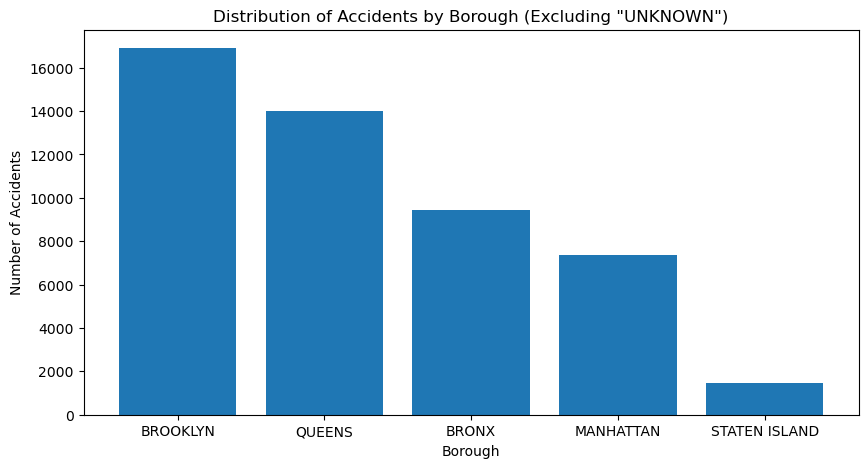

In [25]:
#DATA VISUALIZATION
# Set the figure size
plt.figure(figsize=(10, 5))

# Plotting the data
plt.bar(accidents_borough_known['BOROUGH'], accidents_borough_known['AccidentCount'])
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Borough (Excluding "UNKNOWN")')

# Display the plot
plt.show()

### What is the distribution of the Type of Vehicles Involved?

In [26]:
# Query for the distribution of vehicle types
query_vehicle_type = """
SELECT 
    "VEHICLE TYPE CODE 1" AS VehicleType, 
    COUNT(*) AS AccidentCount,
    COUNT(*)*100.0/(SELECT COUNT(*) FROM Accidents) AS Percentage
FROM 
    Accidents 
GROUP BY 
    VehicleType
ORDER BY 
    AccidentCount DESC
"""

# Execute the query
vehicle_type_distribution = pd.read_sql_query(query_vehicle_type, conn)

# Display the distribution of vehicle types involved in accidents
print(vehicle_type_distribution)


                             VehicleType  AccidentCount  Percentage
0                                  Sedan          34349   45.871449
1    Station Wagon/Sport Utility Vehicle          27541   36.779690
2                                   Taxi           2768    3.696532
3                          Pick-up Truck           1882    2.513321
4                              Box Truck           1417    1.892336
..                                   ...            ...         ...
268                                  Amb              1    0.001335
269                            AMBULENCE              1    0.001335
270                                   1C              1    0.001335
271                           18 WHEELER              1    0.001335
272                                    0              1    0.001335

[273 rows x 3 columns]


Based on the analysis of the type of vehicles involved in the accidents, the top five vehicle types with the highest accident counts and their corresponding percentages are as follows:

1. Sedan: 34,349 accidents, accounting for approximately 45.87% of the total accidents.
2. Station Wagon/Sport Utility Vehicle: 27,541 accidents, representing around 36.78% of the total accidents.
3. Taxi: 2,768 accidents, making up roughly 3.70% of the total accidents.
4. Pick-up Truck: 1,882 accidents, constituting approximately 2.51% of the total accidents.
5. Box Truck: 1,417 accidents, accounting for about 1.89% of the total accidents.

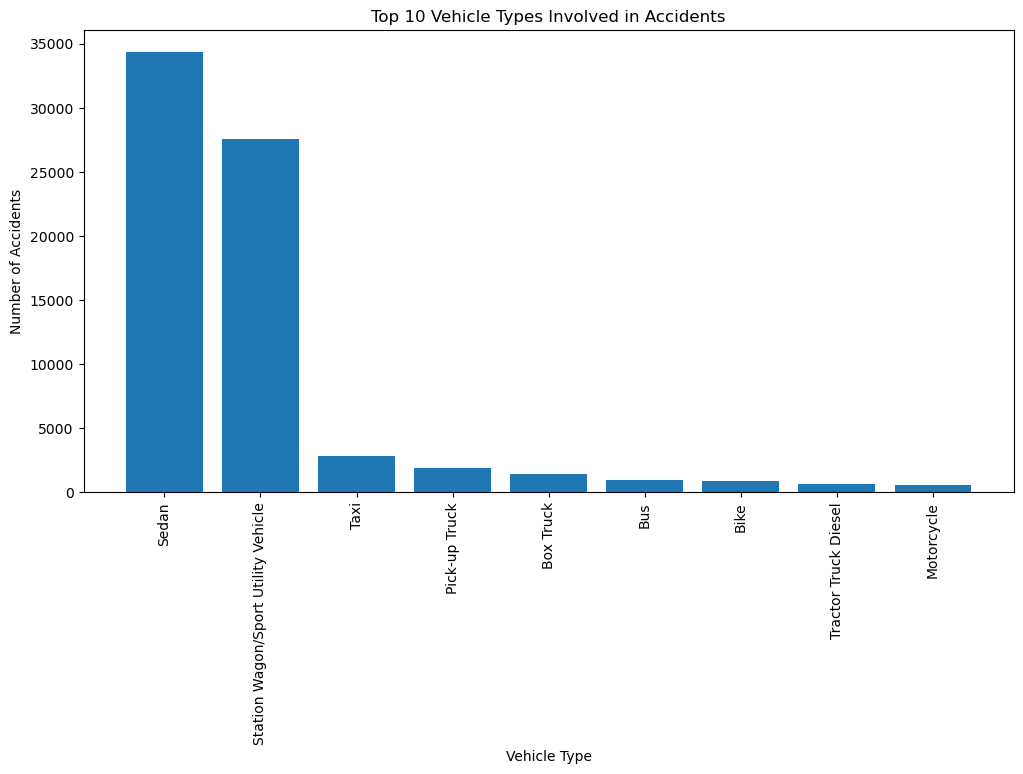

In [30]:
# Filter out None values from the DataFrame
top_10_vehicle_types = top_10_vehicle_types.dropna(subset=['VehicleType'])

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the data
plt.bar(top_10_vehicle_types['VehicleType'], top_10_vehicle_types['AccidentCount'])
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Vehicle Types Involved in Accidents')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()



### Is there any relationship between contributing factors and fatalities or the involvement of certain vehicle types in accidents?

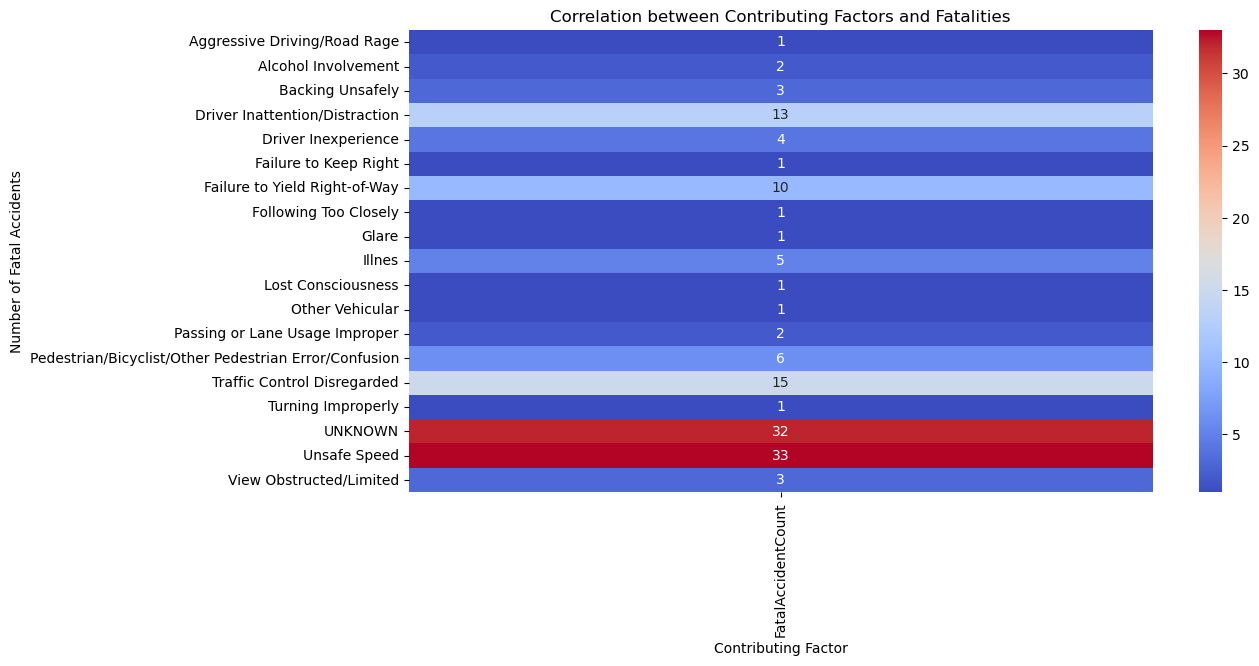

In [32]:

# Query for cross-tabulation of contributing factors and fatalities
query_factor_fatality = """
SELECT 
    "CONTRIBUTING FACTOR VEHICLE 1" AS ContributingFactor, 
    COUNT(*) AS FatalAccidentCount
FROM 
    Accidents 
WHERE 
    "NUMBER OF PERSONS KILLED" > 0
GROUP BY 
    "CONTRIBUTING FACTOR VEHICLE 1"
"""

# Execute the query
factor_fatality_cross_tab = pd.read_sql_query(query_factor_fatality, conn)

# Pivot the data for the heatmap
heatmap_data = factor_fatality_cross_tab.pivot_table(index='ContributingFactor', values='FatalAccidentCount')

# Import Seaborn
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Fatal Accidents')
plt.title('Correlation between Contributing Factors and Fatalities')
plt.xticks(rotation=90)
plt.show()


It is apparent that fatal accidents are highly corelated to unsafe speeds, traffic control disregard and failure to yield the right of way. The Unknown factor is not very significant as it might have resulted from unrecorded or missing values.

In [33]:
conn.close()